# Рынок заведений общественного питания Москвы

Исследование рынка заведений общественного питания Москвы. Цель исследования - ответить на вопрос, имеет ли перспективу небольшое оригинальное кафе. Основное отличие потенциального нового заведения - посетителей должны обслуживать роботы. Чтобы ответить на вопрос, может ли такое кафе иметь популярность в долгосрочной перспективе, необходимо исследовать факторы, влияющие на успешность кафе в Москве.

1. [Часть 1. Подготовка данных](#step1)
2. [Часть 2. Анализ данных](#step2)
3. [Часть 3. Выводы и рекомендации](#step3)


## Презентация

[Ссылка на презентацию](https://yadi.sk/i/e9lVH6Pbbo_u_A)

## Часть 1. Подготовка данных в анализу <a name="step1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly
import re
import numpy as np
import matplotlib as mpl
from cycler import cycler
import requests
from bs4 import BeautifulSoup
from functools import partial
import json
from scipy import stats as st
from matplotlib.ticker import StrMethodFormatter

In [2]:
data = pd.read_csv('/datasets/rest_data.csv', index_col = 'id')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 151635 to 222535
Data columns (total 5 columns):
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(1), object(4)
memory usage: 720.3+ KB


In [4]:
display(data.head(10))

,object_name,chain,object_type,address,number
id,,,,,
151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150


Приведем названия заведений к одному формату: убрать кавычки в названиях, убрать название типа заведения (кафе и тд). Название типа заведения указано в отдельной графе, поэтому удаление его из названия не приведет к потере информации

In [5]:
#Удалим те слова, которые указывают на тип заведения из столбца object_type и удалим первый пробел, если остается
objects_types = data['object_type'].\
                unique().\
                tolist()
                
objects_types = objects_types + ['кофейня','пиццерия']
print(objects_types)

for word in objects_types:
    data['object_name'] = data['object_name']\
                            .str.lower()\
                            .str.replace(word,'')\
                            .str.lstrip()

#удалим кавычки

data['object_name'] = data['object_name']\
                        .str.replace('«', '')\
                        .str.replace('»', '')\
                        .str.replace('ё','е')
display(data.head(10))
print('Количество дубликатов', data.duplicated().sum())

['кафе', 'столовая', 'закусочная', 'предприятие быстрого обслуживания', 'ресторан', 'кафетерий', 'буфет', 'бар', 'магазин (отдел кулинарии)', 'кофейня', 'пиццерия']


,object_name,chain,object_type,address,number
id,,,,,
151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
119365,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
20957,мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
20958,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150


Количество дубликатов 86


После обработки названий появились дубликаты, удалим их

In [6]:
data = data.drop_duplicates()
print('Количество дубликатов', data.duplicated().sum())
print('Строк в таблице после удаления дубликатов',data.shape[0])

Количество дубликатов 0
Строк в таблице после удаления дубликатов 15280


Посмотрим, в каких еще видах названий могут быть разные написания одного и того же заведения

In [7]:
#выберем уникальные название и разделим строки с названием на слова
names = data['object_name'].value_counts().index
names_split = names.str.split()

#опеделим, какие слова чаще всего встречаются в названиях
from collections import Counter
cities_list=[]
for row in names_split:
    try:
        cities_list = cities_list + row
    except:
        print(row)
print(Counter(cities_list).most_common(20))

[('при', 480), ('школа', 468), ('№', 390), ('гбоу', 260), ('и', 173), ('сош', 127), ('-', 118), ('пицца', 110), ('школе', 110), ('шк.', 106), ('на', 104), ('bar', 101), ('кофе', 97), ('школы', 95), ('суши', 90), ('пекарня', 89), ('гоу', 88), ('в', 81), ('колледж', 69), ('кальянная', 68)]


Много названий школ, написанных в разном формате. Однако школьные столовые не представляют интереса для изучения рынка общественного питания, поэтому исправлять названия не будем

Выделим название города и улицы из адреса

In [8]:
#какие строки встречаются до первой запятой в адресе
names_split = data['address'].apply(lambda x:x[0:x.find(',')]).value_counts()
display(names_split.head(10))
display(names_split.shape[0])

город Москва               15209
Николоямская улица             4
улица Ленинская Слобода        4
Солянский тупик                3
город Московский               3
улица Льва Толстого            3
Партизанская улица             2
Таганская площадь              2
2-я Брестская улица            2
Бауманская улица               2
Name: address, dtype: int64

55

Если удалить "город Москва" и взять часть строки до первой запятой, получится название улицы. В случаях, когда город не Москва, а один из пригородов, это не будет ошибкой, так как в конечном итоге нас интересуют заведения внутри Москвы

In [9]:
data['street'] = data['address']\
                .str.replace('ё','е')\
                .str.replace('город Москва, ', '')\
                .apply(lambda x:x[0:x.find(',')])

display(data.head(10))

,object_name,chain,object_type,address,number,street
id,,,,,,
151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
119365,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица
148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
20957,мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица
20958,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная улица


Для анализа данных по сетям все названия заведений одной сети должны быть приведены к одному виду. С текущим набором данных это может быть сделано только полностью вручную и недостаточно точно. Поэтому данные о сетях будут приблизительными.

In [10]:
#заменим наиболее частые варианты написания одного и того же названия, чтобы выделить основные сети
names_dict = {'старбакс':'старбакс',
              'starbucks':'старбакс',
             'суши wok':'суши вок',
              'domino':'домино',
              'subway':'сабвей',
              'kfc':'kfc',
              'братья караваевы':'кулинарная лавка братьев караваевых',
              'братьев караваевых':'кулинарная лавка братьев караваевых',
              'il patio':'иль патио',
              'андерсон':'андерсон',
              'бургер кинг':'бургер кинг',
              'dunkin donuts':'данкин донатс',
              'прайм-':'прайм',
              'prime':'прайм стар',
              'иль-патио':'иль патио',
              'милти':'милти',
              'кофе хаус':'хофе хаус',
              'гудман':'гудман',
              'николай':'николай',
              'волконский':'волконский',
              'krispy krem':'krispy creme',
              'maki maki':'маки маки',
              'coffeeshop':'coffeeshop',
              'moskalyan':'moskalyan',
              'upside down':'upside down cake',
              'азбука вкуса':'азбука вкуса',
              'tutti frutti':'tutti frutti',
              'fridays':'tgi fridays',
              'торро гриль':'торро гриль',
              'мята lounge':'мята lounge'
             }
for key, value in names_dict.items():
    data.loc[data['object_name'].str.contains(key),'object_name'] = value
    

count    15280.000000
mean        59.775785
std         74.829669
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

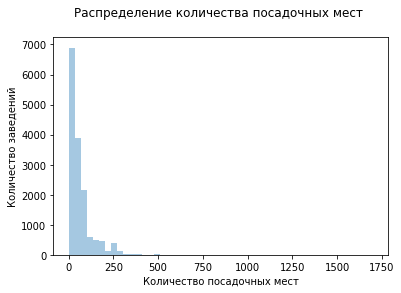

In [11]:
display(data['number'].describe())
sns.distplot(data['number'], kde = False)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.title('Распределение количества посадочных мест \n')
plt.show()

In [12]:
print('95й процентиль',np.percentile(data['number'],95))
print('99й процентиль',np.percentile(data['number'],99))
print('99.5й процентиль',np.percentile(data['number'],99.5))

95й процентиль 215.0
99й процентиль 300.0
99.5й процентиль 350.0


Удалим все строки, где количество мест больше 350, при этом мы потеряем не более 0.5% данных и избавимся от выбросов

In [13]:
data = data.loc[data['number'] <= 350]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15209 entries, 151635 to 222535
Data columns (total 6 columns):
object_name    15209 non-null object
chain          15209 non-null object
object_type    15209 non-null object
address        15209 non-null object
number         15209 non-null int64
street         15209 non-null object
dtypes: int64(1), object(5)
memory usage: 831.7+ KB


In [14]:
data['number'].describe()

count    15209.000000
mean        57.381616
std         63.436243
min          0.000000
25%         13.000000
50%         40.000000
75%         80.000000
max        350.000000
Name: number, dtype: float64

### Вывод

В данных обнаружены неявные дубликаты из-за различных написаний одних и тех же названий заведений. Названия были приведены к одному виду. Кроме того в данных по количеству посадочных мест присутствуют выбросы, они были исключены из рассмотрения (около 0.5% данных)

## Часть 2. Анализ данных <a name="step2"></a>

**Соотношение видов объектов общественного питания по количеству**

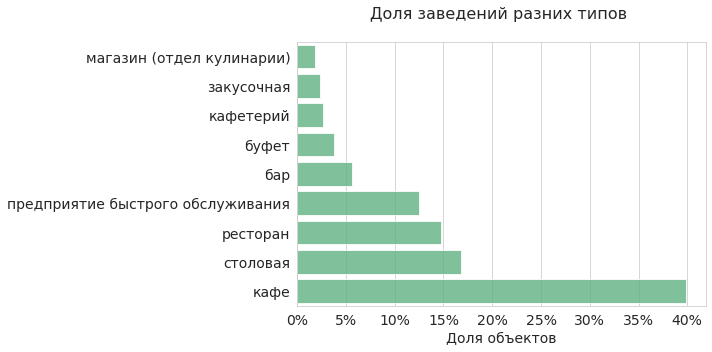

In [15]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,5))

data.\
    groupby('object_type').\
    agg(n_objects = pd.NamedAgg(column='object_name',aggfunc ='count')).\
    sort_values(by = 'n_objects').\
    assign(percentage = lambda x: x['n_objects'] / sum(x['n_objects'])).\
    reset_index().\
    pipe(lambda df: sns.barplot(data = df
                                    , x = 'percentage'
                                    , y = 'object_type'
                                    , orient = 'h'
                                    , color = '#52BE80' 
                                    , alpha = 0.8
                                )
            )


plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))

plt.title('Доля заведений разних типов \n', fontsize = 16)

plt.xlabel('Доля объектов', fontsize = 14)
plt.ylabel('')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()


#plt.savefig('fig1',dpi=1200)
plt.show()

### Вывод

Наибольшую часть среди всех заведений (40%) составляют кафе. Формат кафе может включать в себя множество разных заведений, поэтому он встречается наиболее широко

**Соотношение соотношение сетевых и несетевых заведений по количеству**

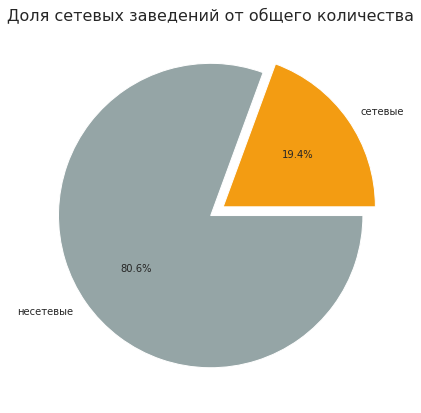

In [16]:
labels = ['сетевые','несетевые']

data.\
        groupby('chain').\
        agg(n_objects = pd.NamedAgg(column = 'object_name', aggfunc = 'count')).\
        sort_values(by = 'n_objects').\
        plot(kind = 'pie',
             y = 'n_objects',
             labels = labels,
             autopct='%.1f%%',
             explode = [0.1, 0],
             colors = ['#F39C12','#95A5A6'],
            legend = None,
            figsize = (7,7))

plt.ylabel('')
plt.title('Доля сетевых заведений от общего количества',fontsize = 16)
plt.rcParams['font.size'] = 16
plt.savefig('fig2')
plt.show()

### Вывод

Сетевые заведения составляют около 20% от всех, большая часть заведений являются несетевыми

**Соотношение соотношение сетевых и несетевых заведений по количеству для разных типов заведений**

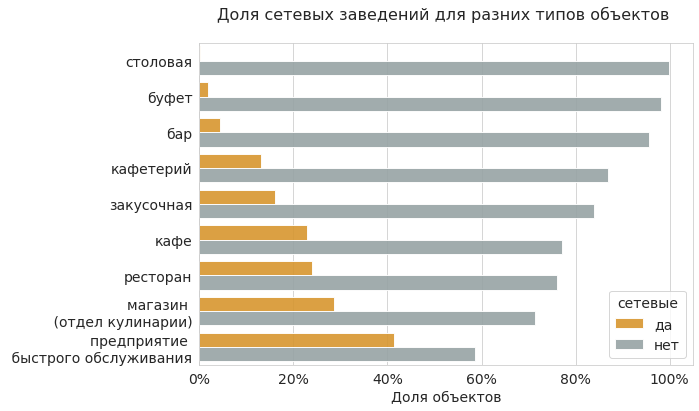

In [17]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))

labels = data.\
    groupby('object_type')['chain'].\
    value_counts(normalize = True).\
    rename('percentage').\
    reset_index().\
    sort_values('percentage').\
    filter(['object_type']).\
    squeeze().\
    str.replace('предприятие быстрого обслуживания','предприятие \n быстрого обслуживания').\
    str.replace('магазин','магазин \n' ).\
    to_list()

data.\
    groupby('object_type')['chain'].\
    value_counts(normalize = True).\
    rename('percentage').\
    reset_index().\
    sort_values('percentage').\
    pipe(lambda df: sns.barplot(data = df
                                    , x = 'percentage'
                                    , y = 'object_type'
                                    , hue = 'chain'
                                    , orient = 'h'
                                    , palette = ['#F39C12','#95A5A6']
                                    , alpha = 0.9
                                )
            )

from matplotlib.ticker import StrMethodFormatter
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}'))

plt.title('Доля сетевых заведений для разних типов объектов \n', fontsize = 16)
plt.xlabel('Доля объектов', fontsize = 14)
plt.ylabel('')

leg = ax.legend(fontsize = 14)
leg.set_title("сетевые", prop = {'size':14})

ax.set_yticklabels(labels=labels)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()


plt.savefig('fig3',dpi=1200)

plt.show()

### Вывод

Наибольший процент сетевых заведений (более 40%) среди предприятий быстрого обслуживания (фаст фуд)

**Характеристика сетевых заведений**

Возьмем сетевые заведения, сгруппируем по названию, чтобы получить количество заведений в сети исключим те названия, для которых 1 заведение: это скорее всего ошибки в написании названия, которые невозможно все отследить, или ошибка определения сетевое/несетевое заведение в исходных данных

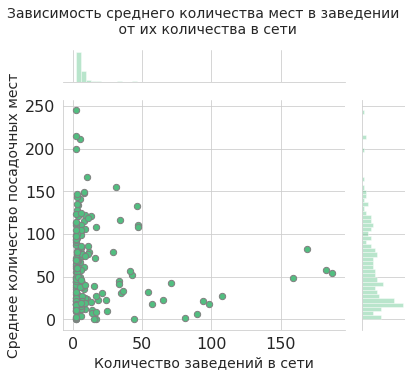

In [18]:

data.\
    query('chain =="да"').\
    groupby('object_name').\
    agg(n_objects = pd.NamedAgg(column = 'object_name', aggfunc = 'count'),
        seats_avg = pd.NamedAgg(column = 'number', aggfunc = 'mean')
       ).\
    query('n_objects > 1').\
    pipe(lambda df: sns.jointplot(x = 'n_objects'
                                  ,y = 'seats_avg'
                                  ,data = df
                                  ,color = '#52BE80'
                                  ,s=40
                                  ,edgecolor="gray"
                                  ,linewidth=1
                                  ,marginal_kws=dict(bins=50),
                                  )
        ).\
    set_axis_labels('Количество заведений в сети', 'Среднее количество посадочных мест', fontsize=14)

plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

plt.suptitle('Зависимость среднего количества мест в заведении \n от их количества в сети', fontsize = 14)
plt.tight_layout(rect=[0, 0.1, 1, 0.92])
plt.savefig('fig4')
plt.show()

### Вывод

Основная масса заведений находится в области небольшого количества заведений сети с небольшим количеством мест (<50)

**Количество посадочных мест для разных типов заведений**

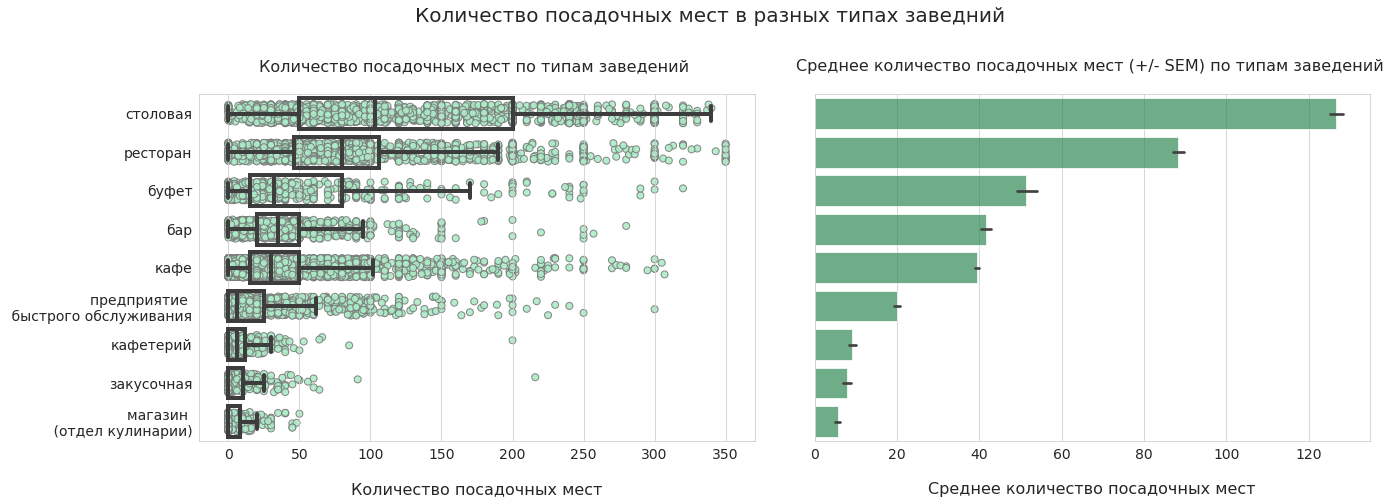

In [19]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (20,8), nrows = 1, ncols = 2)
fig.suptitle('Количество посадочных мест в разных типах заведний', fontsize = 20)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.titlesize']=16
plt.rcParams['axes.labelsize']=16

data.\
    groupby('object_type').\
    agg(seats_mean = pd.NamedAgg(column = 'number', aggfunc = 'mean')
       ).\
    reset_index().\
    sort_values(by = 'seats_mean', ascending = False).\
    pipe(lambda obj: sns.barplot(data = data
                                    ,x = 'number'
                                    ,y = 'object_type'
                                    ,color =  '#229954'
                                    ,orient = 'h'
                                    ,ci = 68
                                    ,estimator = np.mean
                                    ,order = obj['object_type']
                                    ,alpha = 0.7
                                    ,ax = ax[1]
                               )
        )

order = data.\
    groupby('object_type')['number'].\
    mean().\
    reset_index().\
    sort_values(by = 'number', ascending = False).\
    filter(['object_type']).\
    object_type.\
    array

labels = data.\
    groupby('object_type')['number'].\
    mean().\
    reset_index().\
    sort_values(by = 'number', ascending = False).\
    filter(['object_type']).\
    squeeze().\
    str.replace('предприятие быстрого обслуживания','предприятие \n быстрого обслуживания').\
    str.replace('магазин','магазин \n' ).\
    to_list()

sns.stripplot(data = data
              , x='number'
              , y = 'object_type'
              , edgecolor='gray'
              , color = '#ABEBC6'
              , alpha = 0.9
              , linewidth = 1
              , size=7
              , jitter = 0.25
              , zorder=0
              , ax = ax[0]
              , order = order
             )
sns.boxplot(data=data
            , x='number'
            , y='object_type'
            , whis=1.5
            , linewidth = 4
            , boxprops={'facecolor':'none'}
            , fliersize = 0
            , ax = ax[0]
            , order = order
            )

ax[0].set_ylabel('')
ax[0].set_title('Количество посадочных мест по типам заведений \n')
ax[0].set_xlabel('Количество посадочных мест',labelpad=20)
ax[0].set_yticklabels(labels=labels)

ax[1].set_ylabel('')
ax[1].set_title('Среднее количество посадочных мест (+/- SEM) по типам заведений \n')
ax[1].set_xlabel('Среднее количество посадочных мест',labelpad=20)
ax[1].set_yticklabels(labels=[])

plt.tight_layout(rect=[0, 0.1, 1, 0.92])

#plt.savefig('fig5')

plt.show()

### Вывод.

Наибольшее количество посадочных мест в столовых и ресторанах. В кафе в среднем 40 мест

**Топ10 улиц по числу заведений общественно питания**

Определим улицы, на которых находится наибольшее число заведений

In [20]:
top_10_streets = data.\
                groupby('street').\
                agg(n_objects = pd.NamedAgg(column = 'object_name', aggfunc = 'count')).\
                sort_values(by = 'n_objects', ascending = False).\
                reset_index().\
                nlargest(10,'n_objects')

display(top_10_streets)

,street,n_objects
0,город Зеленоград,231
1,проспект Мира,203
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,166
5,Варшавское шоссе,160
6,Ленинский проспект,147
7,поселение Сосенское,138
8,проспект Вернадского,127
9,Кутузовский проспект,112


Среди улиц находится город Зеленоград и поселение Сосенское, которые являются отдельными районами Москвы. Исключим их из рассмотрения

In [21]:
top_10_streets = data.\
                query('street !="город Зеленоград" & street != "поселение Сосенское"').\
                groupby('street').\
                agg(n_objects = pd.NamedAgg(column = 'object_name', aggfunc = 'count')).\
                sort_values(by = 'n_objects', ascending = False).\
                reset_index().\
                nlargest(10,'n_objects')

display(top_10_streets)

,street,n_objects
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,166
4,Варшавское шоссе,160
5,Ленинский проспект,147
6,проспект Вернадского,127
7,Кутузовский проспект,112
8,Каширское шоссе,110
9,Кировоградская улица,108


In [22]:
top_10_streets['street_set'] = top_10_streets['street'].apply(lambda df:set(df.replace(',','')
                                                        .lower()
                                                        .replace('ё','е')
                                                        .replace('№','n')
                                                        .split(' '))
                                                             )
                        
display(top_10_streets)

,street,n_objects,street_set
0,проспект Мира,203,"{мира, проспект}"
1,Профсоюзная улица,182,"{профсоюзная, улица}"
2,Ленинградский проспект,171,"{ленинградский, проспект}"
3,Пресненская набережная,166,"{набережная, пресненская}"
4,Варшавское шоссе,160,"{варшавское, шоссе}"
5,Ленинский проспект,147,"{ленинский, проспект}"
6,проспект Вернадского,127,"{вернадского, проспект}"
7,Кутузовский проспект,112,"{проспект, кутузовский}"
8,Каширское шоссе,110,"{каширское, шоссе}"
9,Кировоградская улица,108,"{кировоградская, улица}"


Поиск округов проведем при помощи парсинга сайта mosopen.ru, на котором есть список улиц для каждого округа

Для начала определим округ, в котором находятся улицы. Для этого превратим название улицы в набор слов (сет), чтобы дальше не зависеть от варианта написания улицы:

In [23]:
top_10_streets['area'] = None

#фунцкия для поиска названия улицы в списке для каждого округа
def find_district(street_set, district):
    if street_set in streets:
        return district

#добудем список улиц для каждого округа с mosopen.ru и выделим округ для нужных улиц

areas = ['cao','sao','svao','vao','uzao','uao','uvao','zao','szao','zelao']

for area in areas:
    url = 'http://mosopen.ru/district/{}/streets'.format(area)
    req = requests.get(url)

    soup=BeautifulSoup(req.text, 'lxml')
    street_links = soup.find_all('a', href = re.compile('http://mosopen.ru/street/.+'))
    streets = []
    for row in street_links:
        streets.append(set(row.text.replace(',','').lower().replace('ё','е').split(' ')))

    print_district = partial(find_district, district = area)
    
    top_10_streets[area] =  top_10_streets['street_set'].apply(print_district)
    

top_10_streets['area'] = top_10_streets[areas].\
                                        apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

top_10_streets = top_10_streets.drop(areas, axis=1)
    
display(top_10_streets)

,street,n_objects,street_set,area
0,проспект Мира,203,"{мира, проспект}","cao,svao"
1,Профсоюзная улица,182,"{профсоюзная, улица}",uzao
2,Ленинградский проспект,171,"{ленинградский, проспект}",sao
3,Пресненская набережная,166,"{набережная, пресненская}",cao
4,Варшавское шоссе,160,"{варшавское, шоссе}","uzao,uao"
5,Ленинский проспект,147,"{ленинский, проспект}","cao,uzao,uao,zao"
6,проспект Вернадского,127,"{вернадского, проспект}","uzao,zao"
7,Кутузовский проспект,112,"{проспект, кутузовский}",zao
8,Каширское шоссе,110,"{каширское, шоссе}",uao
9,Кировоградская улица,108,"{кировоградская, улица}",uao


In [24]:
#получим список районов и адресов страниц

url = 'http://mosopen.ru/regions'
req = requests.get(url)

soup=BeautifulSoup(req.text, 'lxml')

disrtict_links = soup.find('div', attrs = {'id':'regions_by_letters'}).find_all('a', href = re.compile('http://mosopen.ru/region/.+'))
districts = []
districts_pages = []
for row in disrtict_links:
    districts.append(row.text)
    districts_pages.append(row['href'])


In [25]:
#ищем, в каких районах есть эти улицы

pd.set_option('display.max_colwidth', -1)
i=0
for page in districts_pages:
    url = page + '/streets'
    req = requests.get(url)

    soup=BeautifulSoup(req.text, 'lxml')
    street_links = soup.find_all('a', href = re.compile('http://mosopen.ru/street/.+'))
    streets = []
    for row in street_links:
        streets.append(set(row.text.replace(',','').lower().replace('ё','е').split(' ')))
    
    print_district = partial(find_district, district = districts[i])
    
    top_10_streets[districts[i]] = top_10_streets['street_set'].apply(print_district)
    i+=1


top_10_streets['district'] = top_10_streets[districts].\
                                        apply(lambda x: list(x[districts].dropna()), axis=1)

top_10_streets = top_10_streets.drop(districts, axis=1)

display(top_10_streets)

,street,n_objects,street_set,area,district
0,проспект Мира,203,"{мира, проспект}","cao,svao","[Алексеевский, Марьина роща, Мещанский, Останкинский, Ростокино, Свиблово, Ярославский]"
1,Профсоюзная улица,182,"{профсоюзная, улица}",uzao,"[Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево]"
2,Ленинградский проспект,171,"{ленинградский, проспект}",sao,"[Аэропорт, Беговой, Сокол, Хорошёвский]"
3,Пресненская набережная,166,"{набережная, пресненская}",cao,[Пресненский]
4,Варшавское шоссе,160,"{варшавское, шоссе}","uzao,uao","[Бутово Северное, Бутово Южное, Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное]"
5,Ленинский проспект,147,"{ленинский, проспект}","cao,uzao,uao,zao","[Гагаринский, Донской, Ломоносовский, Обручевский, Проспект Вернадского, Тёплый Стан, Тропарёво-Никулино, Якиманка]"
6,проспект Вернадского,127,"{вернадского, проспект}","uzao,zao","[Гагаринский, Ломоносовский, Проспект Вернадского, Раменки, Тропарёво-Никулино]"
7,Кутузовский проспект,112,"{проспект, кутузовский}",zao,"[Дорогомилово, Фили-Давыдково]"
8,Каширское шоссе,110,"{каширское, шоссе}",uao,"[Москворечье-Сабурово, Нагатино-Садовники, Орехово-Борисово Северное, Орехово-Борисово Южное]"
9,Кировоградская улица,108,"{кировоградская, улица}",uao,"[Чертаново Северное, Чертаново Центральное, Чертаново Южное]"


### Вывод

Улицы с максимальным числом заведений находятся практически во всех округах, так как это наиболее длинные улицы города. Они пересекают множество районов, поэтому невозможно выделить единственный район, в котором они находятся

**Улицы с одним объектом общественного питания**

In [26]:
single_object_streets = data.\
                groupby('street', as_index = False)['object_name'].\
                count().\
                query('object_name == 1').\
                reset_index(drop=True)

#создадим сет из названий, чтобы дальше искаать район на mosopen.ru
single_object_streets['street_set'] = single_object_streets['street'].apply(lambda df:set(df.replace(',','')
                                                        .lower()
                                                        .replace('ё','е')
                                                        .replace('№','n')
                                                        .replace('просек','просека')
                                                        .split(' '))
                                                             )
                        
display(single_object_streets[['street','street_set']])

,street,street_set
0,1-й Балтийский переулок,"{переулок, балтийский, 1-й}"
1,1-й Басманный переулок,"{переулок, басманный, 1-й}"
2,1-й Ботанический проезд,"{ботанический, проезд, 1-й}"
3,1-й Вешняковский проезд,"{вешняковский, проезд, 1-й}"
4,1-й Голутвинский переулок,"{переулок, 1-й, голутвинский}"
...,...,...
542,улица Шеногина,"{шеногина, улица}"
543,улица Шумилова,"{шумилова, улица}"
544,улица Шумкина,"{шумкина, улица}"
545,улица Щорса,"{щорса, улица}"


In [27]:
#определим округ
for area in areas:
    url = 'http://mosopen.ru/district/{}/streets'.format(area)
    req = requests.get(url)

    soup=BeautifulSoup(req.text, 'lxml')
    street_links = soup.find_all('a', href = re.compile('http://mosopen.ru/street/.+'))
    streets = []
    for row in street_links:
        streets.append(set(row.text.replace(',','').lower().replace('ё','е').split(' ')))

    print_district = partial(find_district, district = area)
    
    single_object_streets[area] =  single_object_streets['street_set'].apply(print_district)
    

single_object_streets['area'] = single_object_streets[areas].\
                                        apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

single_object_streets = single_object_streets.drop(areas, axis=1)
    
display(single_object_streets[['street','area']])

,street,area
0,1-й Балтийский переулок,sao
1,1-й Басманный переулок,cao
2,1-й Ботанический проезд,svao
3,1-й Вешняковский проезд,uvao
4,1-й Голутвинский переулок,cao
...,...,...
542,улица Шеногина,szao
543,улица Шумилова,uvao
544,улица Шумкина,vao
545,улица Щорса,zao


In [28]:
#поиск района
i=0
for page in districts_pages:
    url = page + '/streets'
    req = requests.get(url)

    soup=BeautifulSoup(req.text, 'lxml')
    street_links = soup.find_all('a', href = re.compile('http://mosopen.ru/street/.+'))
    streets = []
    for row in street_links:
        streets.append(set(row.text.replace(',','').lower().replace('ё','е').split(' ')))
    
    print_district = partial(find_district, district = districts[i])
    
    single_object_streets[districts[i]] = single_object_streets['street_set'].apply(print_district)
    i+=1


single_object_streets['district'] = single_object_streets[districts].\
                                        apply(lambda x: list(x[districts].dropna()), axis=1)

single_object_streets = single_object_streets.drop(districts, axis=1)
display(single_object_streets[['street','area','district']])

,street,area,district
0,1-й Балтийский переулок,sao,[Аэропорт]
1,1-й Басманный переулок,cao,"[Басманный, Красносельский]"
2,1-й Ботанический проезд,svao,[Свиблово]
3,1-й Вешняковский проезд,uvao,[Рязанский]
4,1-й Голутвинский переулок,cao,[Якиманка]
...,...,...,...
542,улица Шеногина,szao,[Хорошёво-Мневники]
543,улица Шумилова,uvao,[Кузьминки]
544,улица Шумкина,vao,[Сокольники]
545,улица Щорса,zao,[Солнцево]


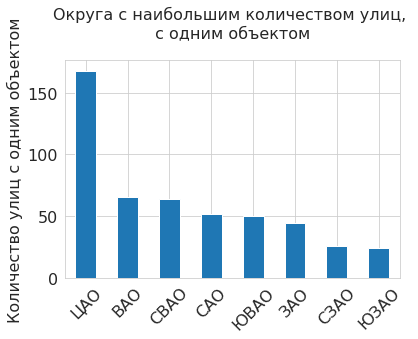

In [29]:
#В каких округах больше всего улиц с одним заведением
fig, ax = plt.subplots()
labels = ['ЦАО','ВАО','СВАО','САО','ЮВАО','ЗАО','СЗАО','ЮЗАО']
single_object_streets['area'].value_counts().plot(kind='bar')
plt.xlim((-0.5,7.5))
plt.ylabel('Количество улиц с одним объектом')
plt.title('Округа с наибольшим количеством улиц, \n с одним объектом \n')
ax.set_xticklabels(labels=labels, rotation = 45)
#plt.savefig('fig6')
plt.show()

In [30]:
#для каких улиц район не определился
single_object_streets[single_object_streets['district'].str.len() == 0]

,street,object_name,street_set,area,district
37,104-й километр Московской Кольцевой Автодороги,1,"{кольцевой, московской, автодороги, километр, 104-й}",,[]
76,26-й километр Московской Кольцевой Автодороги,1,"{кольцевой, московской, 26-й, автодороги, километр}",,[]
92,30-й километр Московской Кольцевой Автодороги,1,"{кольцевой, московской, автодороги, 30-й, километр}",,[]
93,31-й километр Московской Кольцевой Автодороги,1,"{31-й, кольцевой, московской, автодороги, километр}",,[]
94,34-й километр Московской Кольцевой Автодороги,1,"{кольцевой, 34-й, московской, автодороги, километр}",,[]
95,38-й километр Московской Кольцевой Автодороги,1,"{38-й, кольцевой, московской, автодороги, километр}",,[]
102,42-й километр Московской Кольцевой Автодороги,1,"{кольцевой, 42-й, московской, автодороги, километр}",,[]
107,56-й километр Московской Кольцевой Автодороги,1,"{кольцевой, московской, 56-й, автодороги, километр}",,[]
112,65-й километр Московской Кольцевой Автодороги,1,"{кольцевой, 65-й, московской, автодороги, километр}",,[]
113,67-й километр Московской Кольцевой Автодороги,1,"{кольцевой, московской, 67-й, автодороги, километр}",,[]


Районы не определились для МКАД и 9 улиц, информации о которых нет на сайте

In [31]:
# В скольких районах есть улицы с одним заведением
single_object_streets['district'].str[0].nunique()

97

### Вывод

Улицы с одним заведением есть почти во всех районах Москвы (97 из 125). При этом осовная их часть находится в центральном административном округе

**Определение координат по адресу**

Получим координаты всех объектов при помощи API Яндекс-Геокодера следующим образом:

In [32]:
# def find_point_street_api(address):
#     req = requests.get(('https://geocode-maps.yandex.ru/1.x/?apikey={}&format=json&geocode='+address).format(key))
#     resp = req.json()
    
#     try:
#         point = (resp['response']
#              ['GeoObjectCollection']
#              ['featureMember']
#              [0]
#              ['GeoObject']
#              ['Point']
#              ['pos']
#             ).replace(' ',',')
    
#         street = (resp['response']
#           ['GeoObjectCollection']
#           ['featureMember']
#           [0]
#           ['GeoObject']
#           ['metaDataProperty']
#           ['GeocoderMetaData']
#           ['AddressDetails']
#           ['Country']
#           ['AdministrativeArea']
#           ['Locality']
#           ['Thoroughfare']
#           ['ThoroughfareName'])
    
#         return [point,street]
#     except (IndexError, KeyError):
#         return None
    
# def find_district_api(point):
#     req = requests.get(('https://geocode-maps.yandex.ru/1.x/?apikey={}&format=json&geocode='+point).format(key))
#     resp = req.json()
    
#     try:
#         district = (resp['response']
#          ['GeoObjectCollection']
#          ['featureMember']
#          [2]
#          ['GeoObject']
#          ['metaDataProperty']
#          ['GeocoderMetaData']
#          ['AddressDetails']
#          ['Country']
#          ['AdministrativeArea']
#          ['Locality']
#          ["DependentLocality"]
#          ["DependentLocality"]
#          ["DependentLocalityName"])
    
#         return district
#     except (IndexError, KeyError):
#         return None
    


# #сократим количество запросов, используя только уникальные адреса
# unique_addresses = data.groupby('address', as_index = False)['object_name'].count()

# unique_addresses[['point','street_name']] = unique_addresses.apply(lambda x: find_point_street_api(x['address']), axis=1, result_type = 'expand')

# #если нужны районы:
# unique_addresses['district'] = unique_addresses['point'].apply(find_district_api())

# #сохраняем в файл
# unique_addresses.to_csv('unique_addresses.csv', encoding = 'utf-16')

# display(unique_addresses)

In [33]:
#файл с координатами для уникальных адресов, полученный с помощью API яндекс-геокодера
from io import BytesIO
spreadsheet_id = '1LC9fw-0Zh44Kx5ppjiXh2nQqffYOCi9zfT3TIbJ5tMs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
unique_addresses = pd.read_csv(BytesIO(r.content))
display(unique_addresses)

,Unnamed: 0,address,object_name,point,street_name
0,0,"1-й Нагатинский проезд, дом 10",1,"37.632287,55.678458",1-й Нагатинский проезд
1,1,"2-я Брестская улица, дом 1, строение 1",1,"37.593201,55.769074",2-я Брестская улица
2,2,"2-я Брестская улица, дом 5, строение 1",1,"37.590838,55.770335",2-я Брестская улица
3,3,"5-й Котельнический переулок, дом 11",1,"37.649292,55.741723",5-й Котельнический переулок
4,4,"Алтуфьевское шоссе, дом 52А",1,"37.588323,55.878253",Алтуфьевское шоссе
...,...,...,...,...,...
9065,9065,"улица Ленинская Слобода, дом 26, строение 5",2,"37.652768,55.711316",улица Ленинская Слобода
9066,9066,"улица Льва Толстого, дом 18",3,"30.500292,50.441716",улица Льва Толстого
9067,9067,"улица Миклухо-Маклая, дом 18",1,"37.517132,55.645141",улица Миклухо-Маклая
9068,9068,"улица Обручева, дом 23, строение 1",1,"37.531154,55.658464",улица Обручева


In [34]:
#количество адресов, для которых поиск не сработал
unique_addresses['point'].isna().sum()

518

In [35]:
#добавим столбец с координатой и улицей  к исходному датафрейму
df = data.merge(unique_addresses.drop(['object_name'], axis = 1), how = 'left', on = 'address')

df['longitude'] = df['point'].str.split(',').str[0].astype(float)
df['latitude'] = df['point'].str.split(',').str[1].astype(float)
display(df.T)

,0,1,2,3,4,5,6,7,8,9,...,15199,15200,15201,15202,15203,15204,15205,15206,15207,15208
object_name,сметана,родник,академия,пиццетория,вишневая метель,стол. при гоу сош № 1051,брусника,мтуси,кпф семья-1,мтуси,...,шоколадница,шоколадница,шоколадница,шоколадница,шоколадница,шоколадница,шоколадница,шоколадница,шоколадница,шоколадница
chain,нет,нет,нет,да,нет,нет,да,нет,нет,нет,...,да,да,да,да,да,да,да,да,да,да
object_type,кафе,кафе,кафе,кафе,кафе,столовая,кафе,столовая,столовая,столовая,...,кафе,кафе,кафе,кафе,кафе,кафе,кафе,кафе,кафе,кафе
address,"город Москва, улица Егора Абакумова, дом 9","город Москва, улица Талалихина, дом 2/1, корпус 1","город Москва, Абельмановская улица, дом 6","город Москва, Абрамцевская улица, дом 1","город Москва, Абрамцевская улица, дом 9, корпус 1","город Москва, Абрамцевская улица, дом 15, корпус 1","город Москва, переулок Сивцев Вражек, дом 6/2","город Москва, Авиамоторная улица, дом 8, строение 1","город Москва, Авиамоторная улица, дом 8, строение 1","город Москва, Авиамоторная улица, дом 8, строение 1",...,"город Москва, Митинская улица, дом 36, корпус 1","город Москва, площадь Джавахарлала Неру, дом 1","город Москва, Варшавское шоссе, дом 87Б","город Москва, Кантемировская улица, дом 47","город Москва, улица Вавилова, дом 3","город Москва, 3-й Крутицкий переулок, дом 18","город Москва, улица Земляной Вал, дом 33","город Москва, улица Земляной Вал, дом 33","город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1","город Москва, Ходынский бульвар, дом 4"
number,48,35,95,40,50,240,10,90,150,120,...,100,30,54,72,36,50,10,20,36,10
street,улица Егора Абакумова,улица Талалихина,Абельмановская улица,Абрамцевская улица,Абрамцевская улица,Абрамцевская улица,переулок Сивцев Вражек,Авиамоторная улица,Авиамоторная улица,Авиамоторная улица,...,Митинская улица,площадь Джавахарлала Неру,Варшавское шоссе,Кантемировская улица,улица Вавилова,3-й Крутицкий переулок,улица Земляной Вал,улица Земляной Вал,поселение Московский,Ходынский бульвар
Unnamed: 0,7586,8803,582,584,593,585,6383,618,618,618,...,3384,6391,1482,2291,7295,381,7611,7611,6516,5615
point,"37.714474,55.879005","37.673295,55.738307","37.669576,55.735571","37.573007,55.892713","37.572279,55.904074","37.571525,55.906744","37.598043,55.747388","37.715471,55.754882","37.715471,55.754882","37.715471,55.754882",...,"37.361939,55.846694","37.533975,55.693292","37.620698,55.653644","37.656173,55.637794","37.592096,55.706883","37.663943,55.731855","37.659164,55.757339","37.659164,55.757339",NaN,"37.53128,55.790231"
street_name,улица Егора Абакумова,улица Талалихина,Абельмановская улица,Абрамцевская улица,Абрамцевская улица,Абрамцевская улица,переулок Сивцев Вражек,Авиамоторная улица,Авиамоторная улица,Авиамоторная улица,...,Митинская улица,площадь Джавахарлала Неру,Варшавское шоссе,Кантемировская улица,улица Вавилова,3-й Крутицкий переулок,улица Земляной Вал,улица Земляной Вал,NaN,Ходынский бульвар
longitude,37.7145,37.6733,37.6696,37.573,37.5723,37.5715,37.598,37.7155,37.7155,37.7155,...,37.3619,37.534,37.6207,37.6562,37.5921,37.6639,37.6592,37.6592,NaN,37.5313


In [36]:
#информация по координатам
df[['longitude','latitude']].describe()

,longitude,latitude
count,14354.000000,14354.000000
mean,37.601650,55.747478
std,0.180106,0.119149
min,30.271428,50.441716
25%,37.543540,55.705383
50%,37.607026,55.754203
75%,37.659177,55.791913
max,37.949527,59.986326


По координатам есть выбросы, исключим их

In [37]:
#выделим область, куда попадают 98% точек, чтобы исключить случайные выбросы из-за ошибки поиска
bbox = (df.longitude.quantile(0.01),   df.longitude.quantile(0.99),      
         df.latitude.quantile(0.01), df.latitude.quantile(0.99))

print(bbox)

(37.34815639, 37.849886, 55.5697238, 55.9034006)


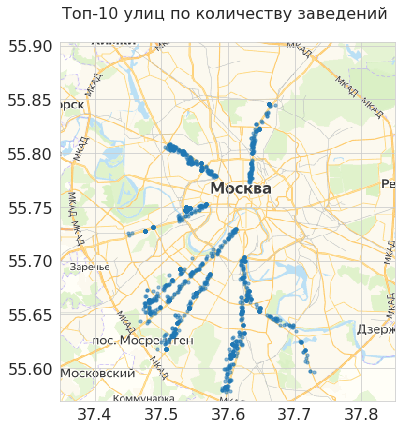

In [38]:
#загрузим область карты, соответствующую этим координатам
map_image = plt.imread(('https://static-maps.yandex.ru/1.x/?&l=map&z=8&bbox={},{}~{},{}').format(bbox[0],bbox[2],bbox[1],bbox[3]))

#область полученной карты не соответствует запросу, похоже это фундаментальное свойство этих карт, надо искать другие методы,
#но раз уж начала, то дорисую, подогнав размер карты
bbox2 = (df.longitude.quantile(0.01) -0.17,   df.longitude.quantile(0.99)+0.17,      
         df.latitude.quantile(0.01)-0.015, df.latitude.quantile(0.99)+0.015)

#объединим карту и координаты
fig, ax = plt.subplots(figsize = (6,6.6))

df_top10 = df.loc[df['street'].isin(top_10_streets['street'])]


ax.scatter(df_top10.longitude, df_top10.latitude, zorder=1, alpha= 0.5, s=10)
ax.set_title('Топ-10 улиц по количеству заведений \n')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(map_image, zorder=0, extent = bbox2, aspect = 'auto')
#plt.savefig('map_top10')
plt.show()



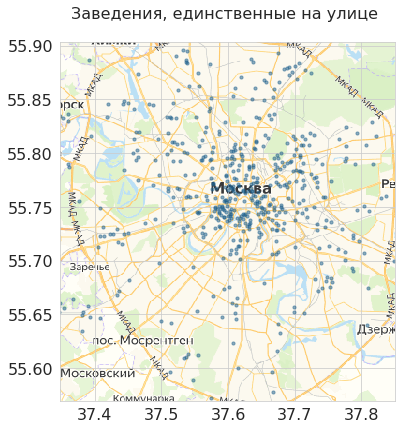

In [39]:
df_single_object = df.loc[df['street'].isin(single_object_streets['street'])]
fig, ax = plt.subplots(figsize = (6,6.6))

ax.scatter(df_single_object.longitude, df_single_object.latitude, zorder=1, alpha= 0.5, c='#1F618D', s=10)
ax.set_title('Заведения, единственные на улице \n')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(map_image, zorder=0, aspect= 'auto', extent = bbox2)
#plt.savefig('map_single')
plt.show()

### Вывод

Улицы, с наибольшим числом заведений являются наиболее крупными в городе. Улицы с одним заведением в основном распрложены в центре. Самая высокая их плотность внутри бульварного кольца. Возможно, потому что там много небольших переулков

**Распределение количества посадочных мест на улицах из топ10**

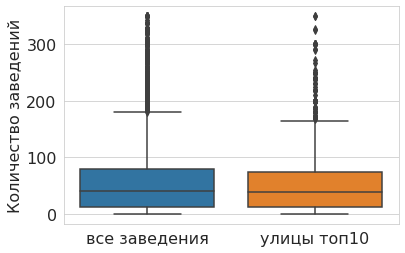

In [40]:
fis, ax = plt.subplots()
sns.boxplot(data = [df['number'],df_top10['number'] ])
plt.ylabel('Количество заведений')
ax.set_xticklabels(['все заведения','улицы топ10'])
plt.show()

In [41]:
#проверим достоверность различий критерием Манна-Уитни
p_value = st.mannwhitneyu(df['number'], df_top10['number'])[1]
print(p_value)
if (p_value < .05):
    print("Отвергаем нулевую гипотезу: между группами есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")

0.06706763887723662
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными


### Вывод

Распределение количества мест вдоль наиболее крупных улицне отличается от общего

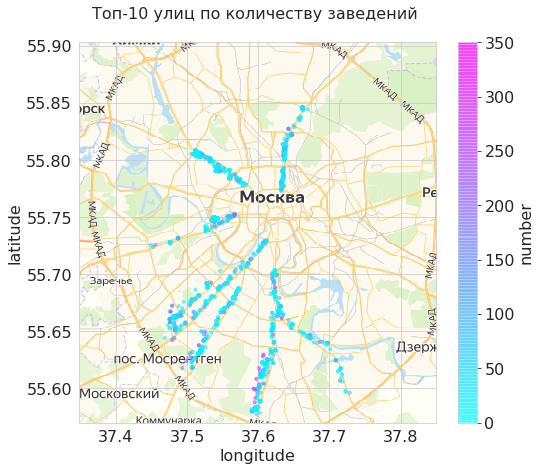

In [42]:
fig, ax = plt.subplots(figsize = (8,7))
df_top10.plot(kind = 'scatter',
              x = 'longitude', 
              y = 'latitude', 
              c = 'number', 
              alpha= 0.5, 
              s=10 ,
              cmap = 'cool',
              ax=ax, 
              colorbar = True)
ax.set_title('Топ-10 улиц по количеству заведений \n')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(map_image, zorder=0, aspect= 'auto', extent = bbox2)
#plt.savefig('map_top10_seats')
plt.show()

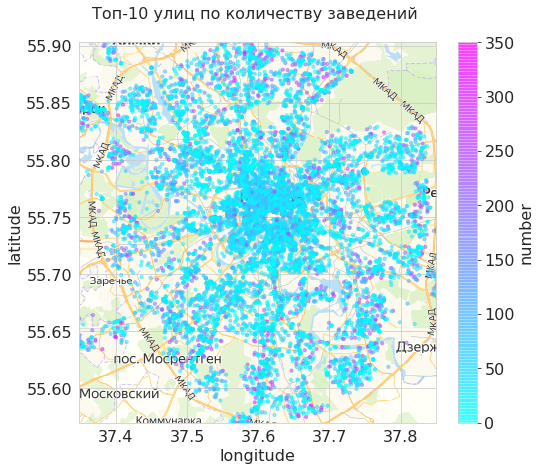

In [43]:
fig, ax = plt.subplots(figsize = (8,7))
df.plot(kind = 'scatter',
              x = 'longitude', 
              y = 'latitude', 
              c = 'number', 
              alpha= 0.5, 
              s=10 ,
              cmap = 'cool',
              ax=ax, 
              colorbar = True)
ax.set_title('Топ-10 улиц по количеству заведений \n')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(map_image, zorder=0, aspect= 'auto', extent = bbox2)
#plt.savefig('map_all_seats')
plt.show()

### Вывод

Заведения с наибольшим числом посадочных мест находятся ближе к периферии. В цетральной чести приобладают заведения с небольшим числом мест

## Часть 3. Выводы и рекомендации <a name="step3"></a>

* Несетевые кафе - самый многочисленный вид заведений общественного питания в Москве


* В средне в кафе около 40 посадочных мест. Наибольшее среднее число посадочных мест в столовых и ресторанах. При этом разброс значений для кафе очень большой из-за того, что кафе может включать в себя заведения разного формата


* Сетевое распространение наиболее характерно для предприятий быстрого питания


* Улицы с наибольшим количеством заведений являются крупными радиальными улицами. Большое количество заведений в частности связано с их большой протяженностью


* Наибольшая плотность улиц с одним заведением общественного питания наблюдается внутри Бульварого кольца, что скорее всего связано с множеством маленьких переулков. В целом, улицы одним заведением встречаются по всему городу


* В центре города преобладают заведения с небольшим количеством посадочных мест, при этом при движении к периферии количество крупных заведений увеличивается


* Наиболее оптимальным решением для нового кафе будет формат небольшого кафе (не более 40 мест) в центральной части города. Такой формат популярен и привычен для москвичей, а оригинальная деталь - обслуживание роботами - может привести дополнительных клиентов
